# 1. Niveles Lingüísticos

## Objetivos

- Trabajar tareas a diferentes niveles lingüísticos (Fonético, Morfólogico, Sintáctico)
- Manipularan y recuperará información de datasets disponibles en Github para resolver tareas de NLP
- Comparar enfoques basados en reglas y estadísticos para el análisis morfológico

## Fonética y Fonología

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/IPA_chart_2020.svg/660px-IPA_chart_2020.svg.png"></center

In [ ]:
%%HTML
<center><iframe width='901' height='600' src='https://www.youtube.com/embed/DcNMCB-Gsn8?controls=1'></iframe></center

In [ ]:
%%HTML
<center><iframe width='900' height='600' src='https://www.youtube.com/embed/74nnLh0Vdcc?controls=1'></iframe></center>

### International Phonetic Alphabet (IPA)

- Las lenguas naturales tienen muchos sonidos diferentes por lo que necesitamos una forma de describirlos independientemente de las lenguas
- IPA es una representación escrita de los [sonidos](https://www.ipachart.com/) del [habla](http://ipa-reader.xyz/)

### Dataset: [IPA-dict](https://github.com/open-dict-data/ipa-dict) de open-dict

- Diccionario de palabras para varios idiomas con su representación fonética
- Representación simple, una palabra por renglon con el formato:

```
[PALABRA][TAB][IPA]

Ejemplos
mariguana	/maɾiɣwana/
zyuganov's   /ˈzjuɡɑnɑvz/, /ˈzuɡɑnɑvz/
```

- [ISO language codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)
- URL: `https://raw.githubusercontent.com/open-dict-data/ipa-dict/master/data/<iso-lang>`

#### Explorando el corpus 🗺️

In [ ]:
IPA_URL = "https://raw.githubusercontent.com/open-dict-data/ipa-dict/master/data/{lang}.txt"

In [ ]:
import requests as r
from pprint import pprint as pp

response = r.get(IPA_URL.format(lang="en_US"))
response.text[:100]

ipa_data = response.text.split("\n")
#print(ipa_data[-4:])
ipa_data[-1]
pp(ipa_data[400:410])

# Puede haber mas de una transcipcion asociada a una palabra
print(ipa_data[-3].split("\t"))

['abuellah\t/əbˈwɛɫə/',
 "abuellah's\t/əbˈwɛɫəz/",
 'abuladze\t/ˌæbjuˈɫædzi/',
 'abundance\t/əˈbəndəns/',
 'abundant\t/əˈbəndənt/',
 'abundantly\t/əˈbəndəntɫi/',
 'aburto\t/əˈbʊɹˌtoʊ/',
 "aburto's\t/əˈbʊɹˌtoʊz/",
 'abuse\t/əbˈjus/, /əbˈjuz/',
 'abused\t/əbˈjuzd/']
["zyuganov's", '/ˈzjuɡɑnɑvz/, /ˈzuɡɑnɑvz/']


In [ ]:
for data in ipa_data[300:500]:
    word, ipa = data.split('\t')
    representations = ipa.split(", ")
    if len(representations) >= 2:
        print(f"{word} --> {representations}")

abs --> ['/ˈæbz/', '/ˈeɪˈbiˈɛs/']
absolve --> ['/æbˈzɑɫv/', '/əbˈzɑɫv/']
absolved --> ['/æbˈzɑɫvd/', '/əbˈzɑɫvd/']
absolves --> ['/æbˈzɑɫvz/', '/əbˈzɑɫvz/']
absolving --> ['/æbˈzɑɫvɪŋ/', '/əbˈzɑɫvɪŋ/']
absorption --> ['/əbˈsɔɹpʃən/', '/əbˈzɔɹpʃən/']
abstain --> ['/æbˈsteɪn/', '/əbˈsteɪn/']
abstained --> ['/æbˈsteɪnd/', '/əbˈsteɪnd/']
abstaining --> ['/æbˈsteɪnɪŋ/', '/əbˈsteɪnɪŋ/']
abstention --> ['/æbˈstɛntʃən/', '/əbˈstɛntʃən/']
abstentions --> ['/æbˈstɛntʃənz/', '/əbˈstɛntʃənz/']
abstract --> ['/ˈæbˌstɹækt/', '/æbˈstɹækt/']
abt --> ['/ˈæbt/', '/ˈeɪˈbiˈti/']
abts --> ['/ˈæbts/', '/ˈeɪˈbiˈtiˈɛs/', '/ˈeɪˈbiˈtiz/']
abuse --> ['/əbˈjus/', '/əbˈjuz/']
abuses --> ['/əbˈjusɪz/', '/əbˈjuzɪz/']
abzug --> ['/ˈæbˌzəɡ/', '/ˈæbˌzʊɡ/']
academicians --> ['/ˌækədəˈmɪʃənz/', '/əˌkædəˈmɪʃənz/']
accent --> ['/ˈækˌsɛnt/', '/əkˈsɛnt/']
accept --> ['/ækˈsɛpt/', '/əkˈsɛpt/']
acceptable --> ['/ækˈsɛptəbəɫ/', '/əkˈsɛptəbəɫ/']
acceptably --> ['/ækˈsɛptəbɫi/', '/əkˈsɛptəbɫi/']
acceptance --> ['/ækˈsɛptəns/', '/

#### Obtención y manipulación

In [ ]:
import http

def download_ipa_corpus(iso_lang: str) -> str:
    """Get ipa-dict file from Github

    Parameters:
    -----------
    iso_lang:
        Language as iso code

    Results:
    --------
    dict:
        Dictionary with words as keys and phonetic representation
        as values for a given lang code
    """
    print(f"Downloading {iso_lang}", end="::")
    response = r.get(IPA_URL.format(lang=iso_lang))
    status_code = response.status_code
    print(f"status={status_code}")
    if status_code != http.HTTPStatus.OK:
        print(f"ERROR on {iso_lang} :(")
        return ""
    return response.text

In [ ]:
download_ipa_corpus("en_US").rstrip()[:50]

"'bout\t/ˈbaʊt/\n'cause\t/kəz/\n'course\t/ˈkɔɹs/\n'cuse\t/"

In [ ]:
def parse_response(response: str) -> dict:
    """Parse text response from ipa-dict to python dict

    Each row have the format:
    [WORD][TAB]/[IPA]/(, /[IPA]/)?

    Parameters
    ----------
    response: str
        ipa-dict raw text

    Returns
    -------
    dict:
        A dictionary with the word as key and the phonetic
        representations as value
    """
    ipa_list = response.rstrip().split("\n")
    result = {}
    for item in ipa_list:
        if item == '':
            continue
        item_list = item.split("\t")
        result[item_list[0]] = item_list[1]
    return result

In [ ]:
parse_response(download_ipa_corpus("en_US"))["ababa"]

'/ˈɑbəbə/, /əˈbɑbə/'

In [ ]:
es_mx_ipa = parse_response(download_ipa_corpus("es_MX"))

In [ ]:
def get_ipa_transcriptions(word: str, dataset: dict) -> list[str]:
    """Search for a word in an IPA phonetics dict

    Given a word this function return the IPA transcriptions

    Parameters:
    -----------
    word: str
        A word to search in the dataset
    dataset: dict
        A dataset for a given language code

    Returns
    -------
    list[str]:
        List with posible transcriptions if any,
        else an empty list
    """
    return dataset.get(word.lower(), "").split(", ")

In [ ]:
get_ipa_transcriptions("mayonesa", es_mx_ipa)

['/maʝonesa/']

#### Obtengamos datasets

In [ ]:
# Get datasets
dataset_es_mx = parse_response(download_ipa_corpus("es_MX"))
dataset_ja = parse_response(download_ipa_corpus("ja"))
dataset_en_us = parse_response(download_ipa_corpus("en_US"))
dataset_fr = parse_response(download_ipa_corpus("fr_FR"))

In [ ]:
# Simple query
get_ipa_transcriptions("beautiful", dataset_en_us)

['/ˈbjutəfəɫ/']

In [ ]:
# Examples
print(f"dog -> {get_ipa_transcriptions('dog', dataset_en_us)} 🐶")
print(f"mariguana -> {get_ipa_transcriptions('mariguana', dataset_es_mx)} 🪴")
print(f"猫 - > {get_ipa_transcriptions('猫', dataset_ja)} 🐈")
print(f"croissant -> {get_ipa_transcriptions('croissant', dataset_fr)} 🥐")

dog -> ['/ˈdɔɡ/'] 🐶
mariguana -> ['/maɾiɣwana/'] 🪴
猫 - > ['/neko/', '/nekoma/'] 🐈
croissant -> ['/kʁwasɑ̃/'] 🥐


In [ ]:
# Diferentes formas de pronunciar
print(f"[es_MX] hotel | {dataset_es_mx['hotel']}")
print(f"[en_US] hotel | {dataset_en_us['hotel']}")

[es_MX] hotel | /otel/
[en_US] hotel | /hoʊˈtɛɫ/


In [ ]:
print(f"[ja] ホテル | {dataset_ja['ホテル']}")
print(f"[fr] hôtel | {dataset_fr['hôtel']}")

[ja] ホテル | /hoteɾɯ/
[fr] hôtel | /otɛl/


#### 🧙🏼‍♂️ Ejercicio: Obtener la distribución de frecuencias de los símbolos fonológicos para español

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

def get_phone_symbols_freq(dataset: dict):
    freqs = defaultdict(int)
    ipas = [_.strip("/") for _ in dataset.values()]
    unique_ipas = set(ipas)
    for ipa in unique_ipas:
        for char in ipa:
            freqs[char] += 1
    return freqs

In [ ]:
freqs_es = get_phone_symbols_freq(dataset_es_mx)
# Sorted by freq number (d[1]) descendent (reverse=True)
distribution_es = dict(sorted(freqs_es.items(), key=lambda d: d[1], reverse=True))
df_es = pd.DataFrame.from_dict(distribution_es, orient='index')

#### Encontrar homófonos (palabras con el mismo sonido pero distina ortografía)

- Ejemplos: Casa-Caza, Vaya-Valla

In [ ]:
from collections import Counter

transcription_counts = Counter(dataset_es_mx.values())
duplicated_transcriptions = [transcription for transcription, freq in transcription_counts.items() if freq > 1]

for ipa in duplicated_transcriptions[-10:]:
    words = [word for word, transcription in dataset_es_mx.items() if transcription == ipa]
    print(f"{ipa} => {words}")

/bexetas/ => ['vegetas', 'vejetas']
/bexete/ => ['vegete', 'vejete']
/bexetes/ => ['vegetes', 'vejetes']
/bexes/ => ['vejes', 'vejez']
/beɾas/ => ['veras', 'veraz']
/bise/ => ['vice', 'vise']
/bises/ => ['vices', 'vises']
/biβas/ => ['vivas', 'vivaz']
/bos/ => ['vos', 'voz']
/ʝak/ => ['yac', 'yak']


#### Obteniendo todos los datos

In [ ]:
lang_codes = {
    "ar": "Arabic (Modern Standard)",
    "de": "German",
    "en_UK": "English (Received Pronunciation)",
    "en_US": "English (General American)",
    "eo": "Esperanto",
    "es_ES": "Spanish (Spain)",
    "es_MX": "Spanish (Mexico)",
    "fa": "Persian",
    "fi": "Finnish",
    "fr_FR": "French (France)",
    "fr_QC": "French (Québec)",
    "is": "Icelandic",
    "ja": "Japanese",
    "jam": "Jamaican Creole",
    "km": "Khmer",
    "ko": "Korean",
    "ma": "Malay (Malaysian and Indonesian)",
    "nb": "Norwegian Bokmål",
    "nl": "Dutch",
    "or": "Odia",
    "ro": "Romanian",
    "sv": "Swedish",
    "sw": "Swahili",
    "tts": "Isan",
    "vi_C": "Vietnamese (Central)",
    "vi_N": "Vietnamese (Northern)",
    "vi_S": "Vietnamese (Southern)",
    "yue": "Cantonese",
    "zh_hans": "Mandarin (Simplified)",
    "zh_hant": "Mandarin (Traditional)"
}
iso_lang_codes = list(lang_codes.keys())

In [ ]:
def get_corpora() -> dict:
    """Download corpora from ipa-dict github

    Given a list of iso lang codes download available datasets.

    Returns
    -------
    dict
        Lang codes as keys and dictionary with words-transcriptions
        as values
    """
    return {
        code: parse_response(download_ipa_corpus(code))
         for code in iso_lang_codes
        }

In [ ]:
data = get_corpora()

#### Sistema de búsqueda (naïve)

In [ ]:
from rich import print as rprint
from rich.columns import Columns
from rich.panel import Panel
from rich.text import Text

In [ ]:
def get_formated_string(code: str, name: str):
    return f"[b]{name}[/b]\n[yellow]{code}"

In [ ]:
rprint(Panel(Text("Representación fonética de palabras", style="bold", justify="center")))
rendable_langs = [Panel(get_formated_string(code, lang), expand=True) for code, lang in lang_codes.items()]
rprint(Columns(rendable_langs))

lang = input("lang>> ")
rprint(f"Selected language: {lang_codes[lang]}") if lang else rprint("Adios 👋🏼")
while lang:
    sub_dataset = data[lang]
    query = input(f"  [{lang}]word>> ")
    results = get_ipa_transcriptions(query, sub_dataset)
    rprint(query, " | ", ", ".join(results))
    while query:
        query = input(f"  [{lang}]word>> ")
        if query:
            results = get_ipa_transcriptions(query, sub_dataset)
            rprint(query, " | ", ", ".join(results))
    lang = input("lang>> ")
    rprint(f"Selected language: {lang_codes[lang]}") if lang else rprint("Adios 👋🏼")

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                       Representación fonética de palabras                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Arabic (Modern Standard)   │ │ German                           │ │ English (Received Pronunciation) │
│ ar                         │ │ de                               │ │ en_UK                            │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ English (General American) │ │ Esperanto                        │ │ Spanish (Spain)                  │
│ en_US                      │ │ eo                               │ │ es_ES                            │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Spanish (Mexico)           │ │ Persian                          │ │ Finnish                          │
│ es_MX                      │ │ fa                               │ │ fi                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ French (France)            │ │ French (Québec)                  │ │ Icelandic                        │
│ fr_FR                      │ │ fr_QC                            │ │ is                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Japanese                   │ │ Jamaican Creole                  │ │ Khmer                            │
│ ja                         │ │ jam                              │ │ km                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Korean                     │ │ Malay (Malaysian and Indonesian) │ │ Norwegian Bokmål                 │
│ ko                         │ │ ma                               │ │ nb                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Dutch                      │ │ Odia                             │ │ Romanian                         │
│ nl                         │ │ or                               │ │ ro                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Swedish                    │ │ Swahili                          │ │ Isan                             │
│ sv                         │ │ sw                               │ │ tts                              │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Vietnamese (Central)       │ │ Vietnamese (Northern)            │ │ Vietnamese (Southern)            │
│ vi_C                       │ │ vi_N                             │ │ vi_S                             │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Cantonese                  │ │ Mandarin (Simplified)            │ │ Mandarin (Traditional)           │
│ yue     

lang>> 


Adios 👋🏼

#### 👩‍🔬 Ejercicio: Obtener palabras con pronunciación similar

In [ ]:
from collections import defaultdict

def get_rhyming_patterns(sentence: str, dataset: dict) -> dict[str, list]:
    words = sentence.split()
    word_ipa_map = {}
    for word in words:
        ipa_transcriptions = get_ipa_transcriptions(word, dataset)
        # Remove "/" char from transcriptions
        word_ipa_map.update({word: [_.strip("/") for _ in ipa_transcriptions]})

    rhyming_patterns = defaultdict(list)
    for word, ipas in word_ipa_map.items():
        for ipa in ipas:
            # Getting last 2 elements of the ipa representation
            pattern = ipa[-2:]
            rhyming_patterns[pattern].append(word)
    return rhyming_patterns

def display_rhyming_patterns(patterns: dict[str, list]) -> None:
    for pattern, words in patterns.items():
        if len(set(words)) > 1:
            print(f"{pattern}:: {', '.join(words)}")

#### Testing

```
ɣo:: juego, fuego
on:: con, corazón
ʎa:: brilla, orilla
```

In [ ]:
#sentence = "There once was a cat that ate a rat and after that sat on a yellow mat"
#sentence = "the cat sat on the mat and looked at the rat."
sentence = "If you drop the ball it will fall on the doll"
#sentence = "cuando juego con fuego siento como brilla la orilla de mi corazón"

dataset = data.get("en_US")
rhyming_words = get_rhyming_patterns(sentence, dataset)
display_rhyming_patterns(rhyming_words)

ɔɫ:: ball, fall
ɑɫ:: fall, doll


#### Material extra (fonética)

In [ ]:
!apt-get install espeak -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 1s (1,730 

In [ ]:
!espeak -v es "Hola que hace" -w mi-prueba.wav

## Morfología

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flexi%C3%B3nGato-svg.svg/800px-Flexi%C3%B3nGato-svg.svg.png" height=300></center>

> De <a href="//commons.wikimedia.org/wiki/User:KES47" class="mw-redirect" title="User:KES47">KES47</a> - <a href="//commons.wikimedia.org/wiki/File:Flexi%C3%B3nGato.png" title="File:FlexiónGato.png">File:FlexiónGato.png</a> y <a href="//commons.wikimedia.org/wiki/File:Nuvola_apps_package_toys_svg.svg" title="File:Nuvola apps package toys svg.svg">File:Nuvola apps package toys svg.svg</a>, <a href="http://www.gnu.org/licenses/lgpl.html" title="GNU Lesser General Public License">LGPL</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=27305101">Enlace</a>

El análisis morfológico es la determinación de las partes que componen la palabra y su representación lingüística, es una especie de etiquetado

Los elementos morfológicos son analizados para:

- Determinar la función morfológica de las palabras
- Hacer filtrado y pre-procesamiento de text

### Análisis morfológico basado en reglas

Recordemos que podemos hacer un analizador morfológico haciendo uso de un transductor que vaya leyendo y haciendo transformaciones en una cadena. Formalmente:

* $Q = \{q_0, \ldots, q_T\}$ conjunto finito de estados.
* $\Sigma$ es un alfabeto de entrada.
* $q_0 \in Q$ es el estado inicial.
* $F \subseteq Q$ es el conjunto de estados finales.

Un transductor es una 6-tupla $T = (Q, \Sigma, \Delta, q_0, F, \sigma)$ tal que

* $\Delta$ es un alfabeto de salida teminal
* $\Sigma$ es un alfabeto de entrada no terminal
* $\sigma: Q \times \Sigma \times \Delta \longrightarrow Q$ función de transducción

#### EJEMPLO: Parsing con expresiones regulares

Con fines de prácticidad vamos a _imitar_ el comportamiento de un transductor utilizando el modulo de python `re`

La estructura del sustantivo en español es:

` BASE+AFIJOS (marcas flexivas)   --> Base+DIM+GEN+NUM`

In [ ]:
palabras = [
    'niño',
    'niños',
    'niñas',
    'niñitos',
    'gato',
    'gatos',
    'gatitos',
    'perritos',
    'paloma',
    'palomita',
    'palomas',
    'flores',
    'flor',
    'florecita',
    'lápiz',
    'lápices',
    # 'chiquitititititos',
    #'curriculum', # curricula
    #'campus', # campi
]

In [ ]:
import re

def morph_parser_rules(words: list[str]) -> list[str]:
    """Aplica reglas morfológicas a una lista de palabras para realizar
    un análisis morfológico.

    Parameters:
    ----------
    words : list of str
        Lista de palabras a las que se les aplicarán las reglas morfológicas.

    Returns:
    -------
    list of str
        Una lista de palabras después de aplicar las reglas morfológicas.
    """

    # Lista para guardar las palabras parseadas
    morph_parsing = []

    # Reglas que capturan ciertos morfemas
    # {ecita, itos, as, os}
    for w in words:
        # ecit -> DIM
        R0 = re.sub(r'([^ ]+)ecit([a|o|as|os])', r'\1-DIM\2', w)
        # it -> DIM
        R1 = re.sub(r'([^ ]+)it([a|o|as|os])', r'\1-DIM\2', R0)
        # a(s) -> FEM
        R2 = re.sub(r'([^ ]+)a(s)', r'\1-FEM\2', R1)
        # a -> FEM
        R3 = re.sub(r'([^ ]+)a\b', r'\1-FEM', R2)
        # o(s) -> MSC
        R4 = re.sub(r'([^ ]+)o(s)', r'\1-MSC\2', R3)
        # o .> MSC
        R5 = re.sub(r'([^ ]+)o\b', r'\1-MSC', R4)
        # es -> PL
        R6 = re.sub(r'([^ ]+)es\b', r'\1-PL', R5)
        # s -> PL
        R7 = re.sub(r'([^ ]+)s\b', r'\1-PL', R6)
        # Sustituye la c por z cuando es necesario
        parse = re.sub(r'c-', r'z-', R7)

        # Guarda los parseos
        morph_parsing.append(parse)
    return morph_parsing

In [ ]:
morph_parsing = morph_parser_rules(palabras)
for palabra, parseo in zip(palabras, morph_parsing):
    print(palabra, "-->", parseo)

niño --> niñ-MSC
niños --> niñ-MSC-PL
niñas --> niñ-FEM-PL
niñitos --> niñ-DIM-MSC-PL
gato --> gat-MSC
gatos --> gat-MSC-PL
gatitos --> gat-DIM-MSC-PL
perritos --> perr-DIM-MSC-PL
paloma --> palom-FEM
palomita --> palom-DIM-FEM
palomas --> palom-FEM-PL
flores --> flor-PL
flor --> flor
florecita --> flor-DIM-FEM
lápiz --> lápiz
lápices --> lápiz-PL


#### Preguntas 🤔
- ¿Qué pasa con las reglas en lenguas donde son más comunes los prefijos y no los sufijos?
- ¿Cómo podríamos identificar características de las lenguas?

#### Herramientas para hacer sistemas de análisis morfológico basados en reglas

- [Apertium](https://en.wikipedia.org/wiki/Apertium)
- [Foma](https://github.com/mhulden/foma/tree/master)
- [Helsinki Finite-State Technology](https://hfst.github.io/)
- Ejemplo [proyecto](https://github.com/apertium/apertium-yua) de analizador morfológico de Maya Yucateco
- Ejemplo normalizador ortográfico del [Náhuatl](https://github.com/ElotlMX/py-elotl/tree/master)


También se pueden utilizar diferentes métodos de aprendizaje de máquina para realizar análisis/generación morfológica. En los últimos años ha habido un shared task de [morphological reinflection](https://github.com/sigmorphon/2023InflectionST) para poner a competir diferentes métodos

### Segmentación morfológica

#### Corpus: [SIGMORPHON 2022 Shared Task on Morpheme Segmentation](https://github.com/sigmorphon/2022SegmentationST/tree/main)

- Shared task donde se buscaba convertir las palabras en una secuencia de morfemas
- Dividido en dos partes:
    - Segmentación a nivel de palabras (nos enfocaremos en esta)
    - Segmentación a nivel oraciones

#### Track: words

| word class | Description                      | English example (input ==> output)     |
|------------|----------------------------------|----------------------------------------|
| 100        | Inflection only                  | played ==> play @@ed                   |
| 010        | Derivation only                  | player ==> play @@er                   |
| 101        | Inflection and Compound          | wheelbands ==> wheel @@band @@s        |
| 000        | Root words                       | progress ==> progress                  |
| 011        | Derivation and Compound          | tankbuster ==> tank @@bust @@er        |
| 110        | Inflection and Derivation        | urbanizes ==> urban @@ize @@s          |
| 001        | Compound only                    | hotpot ==> hot @@pot                   |
| 111        | Inflection, Derivation, Compound | trackworkers ==> track @@work @@er @@s

#### Explorando el corpus

In [ ]:
response = r.get("https://raw.githubusercontent.com/sigmorphon/2022SegmentationST/main/data/spa.word.test.gold.tsv")
response.text[:100]

'astronómica\tastronómico @@a\t100\nresignifiques\tresignificar @@es\t100\nimportunamente\timportuno @@mente'

In [ ]:
raw_data = response.text.split("\n")
raw_data[-2]

'sumárieles\tsumario @@ar @@e @@les\t110'

In [ ]:
element = raw_data[2].split("\t")
element

['importunamente', 'importuno @@mente', '010']

In [ ]:
element[1].split()

['importuno', '@@mente']

In [ ]:
LANGS = {
    "ces": "Czech",
    "eng": "English",
    "fra": "French",
    "hun": "Hungarian",
    "spa": "Spanish",
    "ita": "Italian",
    "lat": "Latin",
    "rus": "Russian",
}
CATEGORIES = {
    "100": "Inflection",
    "010": "Derivation",
    "101": "Inflection, Compound",
    "000": "Root",
    "011": "Derivation, Compound",
    "110": "Inflection, Derivation",
    "001": "Compound",
    "111": "Inflection, Derivation, Compound"
}

In [ ]:
def get_track_files(lang: str, track: str = "word") -> list[str]:
    """Genera una lista de nombres de archivo del shared task

    Con base en el idioma y el track obtiene el nombre de los archivos
    para con información reelevante para hacer análisis estadístico.
    Esto es archivos .test y .dev

    Parameters:
    ----------
    lang : str
        Idioma para el cual se generarán los nombres de archivo.
    track : str, optional
        Track del shared task de donde vienen los datos (por defecto es "word").

    Returns:
    -------
    list[str]
        Una lista de nombres de archivo generados para el idioma y la pista especificados.
    """
    return [
        f"{lang}.{track}.test.gold",
        f"{lang}.{track}.dev",
    ]

In [ ]:
def get_raw_corpus(files: list) -> list:
    """Descarga y concatena los datos de los archivos tsv desde una URL base.

    Parameters:
    ----------
    files : list
        Lista de nombres de archivos (sin extensión) que se descargarán
        y concatenarán.

    Returns:
    -------
    list
        Una lista que contiene los contenidos descargados y concatenados
        de los archivos tsv.
    """
    result = []
    for file in files:
        print(f"Downloading {file}.tsv", end=" ")
        response = r.get(f"https://raw.githubusercontent.com/sigmorphon/2022SegmentationST/main/data/{file}.tsv")
        print(f"status={response.status_code}")
        lines = response.text.split("\n")
        result.extend(lines[:-1])
    return result

In [ ]:
import pandas as pd

def raw_corpus_to_dataframe(corpus_list: list, lang: str) -> pd.DataFrame:
    """Convierte una lista de datos de corpus en un DataFrame

    Parameters:
    ----------
    corpus_list : list
        Lista de líneas del corpus a convertir en DataFrame.
    lang : str
        Idioma al que pertenecen los datos del corpus.

    Returns:
    -------
    pd.DataFrame
        Un DataFrame de pandas que contiene los datos del corpus procesados.
    """
    data_list = []
    for line in corpus_list:
        try:
            word, tagged_data, category = line.split("\t")
        except ValueError:
            # Caso donde no existe la categoria
            word, tagged_data = line.split("\t")
            category = "NOT_FOUND"
        morphemes = tagged_data.split()
        data_list.append({"words": word, "morph": morphemes, "category": category, "lang": lang})
    df = pd.DataFrame(data_list)
    df["word_len"] = df["words"].apply(lambda x: len(x))
    df["morph_count"] = df["morph"].apply(lambda x: len(x))
    return df

In [ ]:
files = get_track_files("spa")
raw_spa = get_raw_corpus(files)
df = raw_corpus_to_dataframe(raw_spa, lang="spa")

In [ ]:
df.head()

,words,morph,category,lang,word_len,morph_count
0,astronómica,"[astronómico, @@a]",100,spa,11,2
1,resignifiques,"[resignificar, @@es]",100,spa,13,2
2,importunamente,"[importuno, @@mente]",010,spa,14,2
3,conjeturaríamos,"[conjeturar, @@ría, @@amos]",100,spa,15,3
4,adquiridla,"[adquirir, @@id, @@la]",100,spa,10,3


#### Análisis cuantitativo para el Español

In [ ]:
print("Total unique words:", len(df["words"].unique()))
df["category"].value_counts().head(30)

Total unique words: 172173


,count
category,
100,84377
110,78803
010,5710
000,3059
101,118
001,58
111,36
011,12


In [ ]:
df["word_len"].mean()

10.688301882408972

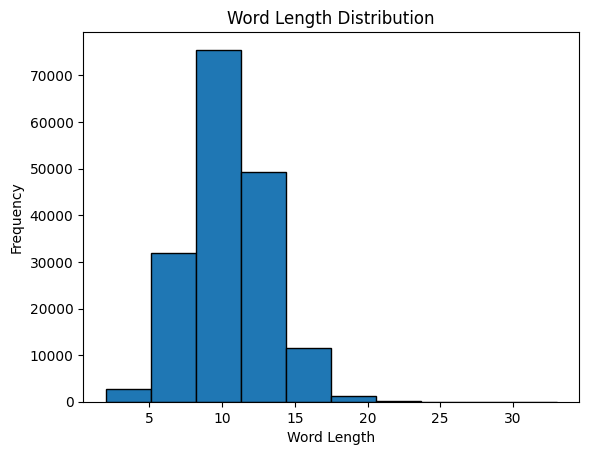

In [ ]:
from matplotlib import pyplot as plt

plt.hist(df['word_len'], bins=10, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution')
plt.show()

In [ ]:
def plot_histogram(df, kind, lang):
    """Genera un histograma de frecuencia para una columna específica
    en un DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos para generar el histograma.
    kind : str
        Nombre de la columna para la cual se generará el histograma.
    lang : str
        Idioma asociado a los datos.

    Returns:
    -------
    None
        Esta función muestra el histograma usando matplotlib.
    """
    counts = df[kind].value_counts().head(30)
    plt.bar(counts.index, counts.values)
    plt.xlabel(kind)
    plt.ylabel('Frequency')
    plt.title(f'{kind} Frequency Graph for {lang}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

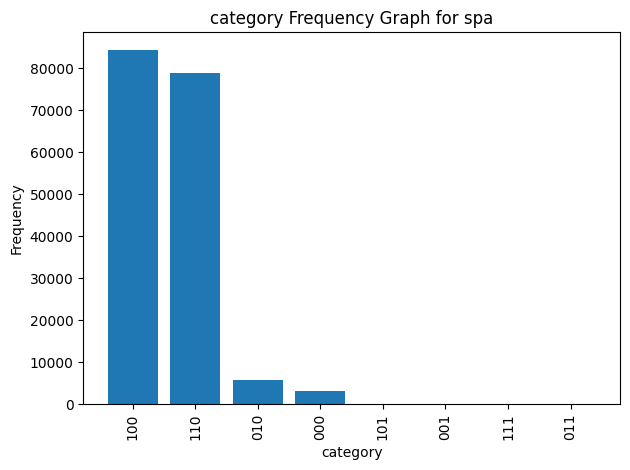

In [ ]:
plot_histogram(df, "category", "spa")

#### Morfosintaxis

- Etiquetas que hacen explícita la funcion gramatical de las palabras en una oración
- Determina la función de la palabra dentro la oración (por ello se le llama Partes del Discurso)
- Se le conoce tambien como **Análisis morfosintáctico**: es el puente entre la estructura de las palabras y la sintaxis
- Permiten el desarrollo de herramientas de NLP más avanzadas
- El etiquetado es una tarea que se puede abordar con técnicas secuenciales, por ejemplo, HMMs, CRFs, Redes neuronales

<center><img src="https://byteiota.com/wp-content/uploads/2021/01/POS-Tagging.jpg" height=500 width=500></center

#### Ejemplo

> El gato negro rie malvadamente

- El - DET
- gato - NOUN
- negro - ADJ
- ríe - VER

<center><img src="https://i.pinimg.com/originals/0e/f1/30/0ef130b255ea704625b2ad473701dee5.gif"></center

### Etiquetado POS usando Conditional Random Fields (CRFs)

- Modelo de gráficas **no dirigido**. Generaliza los *HMM*
    - Adiós a la *Markov assuption*
    - Podemos tener cualquier dependencia que queramos entre nodos
    - Nos enfocaremos en un tipo en concreto: *LinearChain-CRFs* ¡¿Por?!

<center><img width=300 src="https://i.kym-cdn.com/entries/icons/original/000/032/676/Unlimited_Power_Banner.jpg"></center>


- Modela la probabilidad **condicional** $P(Y|X)$
    - Modelo discriminativo
    - Probabilidad de un estado oculto dada **toda** la secuecia de entrada
![homer](https://media.tenor.com/ul0qAKNUm2kAAAAd/hiding-meme.gif)

- Captura mayor **número de dependencias** entre las palabras y captura más características
    - Estas se definen en las *feature functions* 🙀
- El entrenamiento se realiza aplicando gradiente decendente y optimización con algoritmos como [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)


<center><img src="https://iameo.github.io/images/gradient-descent-400.gif"></center>


$P(\overrightarrow{y}|\overrightarrow{x}) = \frac{1}{Z} \displaystyle\prod_{i=1}^N exp\{w^T ⋅ \phi(y_{i-1}, y_i, \overrightarrow{x}, i)\}$

Donde:
- $\overrightarrow{y}$ = Etiquetas POS
- $\overrightarrow{x}$ = Palabras en una oración
- $w^T$ = Vector de pesos a aprender
- $\phi$ = Vector de *Features*
    - Calculado con base en un conjunto de *feature functions*
- $i$ = la posición actual en la oración
- $Z$ = factor de normalización

![](https://aman.ai/primers/ai/assets/conditional-random-fields/Conditional_Random_Fields.png)

Tomado de http://www.davidsbatista.net/blog/2017/11/13/Conditional_Random_Fields/

#### Feature functions

$\phi(y_{i-1}, y_i, \overrightarrow{x}, i)$

- Parte fundamental de los CRFs
- Cuatro argumentos:
    - Todos los datos observables $\overrightarrow{x}$ (conectar $x$ con cualquier $y$)
    - El estado oculto anterior $y_{i-1}$
    - El estado oculto actual $y_i$
    - El index del timestamp $i$
        - Cada feature list puede tener diferentes formas

- Aqui es donde esta la flexibilidad del modelo
- Tantas features como querramos, las que consideremos que pueden ayudar a que el modelo tenga un mejor desempeño
    - Intimamente ligadas a la lengua. Para mejor desempeño se debe hacer un análisis de sus características.
- Ejemplo:

```python
[
    "word.lower()",
    "EOS",
    "BOS",
    "postag",
    "pre-word",
    "nxt-word",
    "word-position",
    ...
]
```

### Implementación de CRFs

In [ ]:
!pip install nltk
!pip install scikit-learn
!pip install -U sklearn-crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.1 MB/s eta 0:00:00


#### Obteniendo otro corpus más

In [ ]:
import nltk

# Descargando el corpus cess_esp: https://www.nltk.org/book/ch02.html#tab-corpora
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


True

In [ ]:
from nltk.corpus import cess_esp
# Cargando oraciones
corpora = cess_esp.tagged_sents()

In [ ]:
corpora[1]

[('Una', 'di0fs0'),
 ('portavoz', 'nccs000'),
 ('de', 'sps00'),
 ('EDF', 'np00000'),
 ('explicó', 'vmis3s0'),
 ('a', 'sps00'),
 ('EFE', 'np00000'),
 ('que', 'cs'),
 ('el', 'da0ms0'),
 ('proyecto', 'ncms000'),
 ('para', 'sps00'),
 ('la', 'da0fs0'),
 ('construcción', 'ncfs000'),
 ('de', 'sps00'),
 ('Altamira_2', 'np00000'),
 (',', 'Fc'),
 ('al', 'spcms'),
 ('norte', 'ncms000'),
 ('de', 'sps00'),
 ('Tampico', 'np00000'),
 (',', 'Fc'),
 ('prevé', 'vmm02s0'),
 ('la', 'da0fs0'),
 ('utilización', 'ncfs000'),
 ('de', 'sps00'),
 ('gas', 'ncms000'),
 ('natural', 'aq0cs0'),
 ('como', 'cs'),
 ('combustible', 'ncms000'),
 ('principal', 'aq0cs0'),
 ('en', 'sps00'),
 ('una', 'di0fs0'),
 ('central', 'ncfs000'),
 ('de', 'sps00'),
 ('ciclo', 'ncms000'),
 ('combinado', 'aq0msp'),
 ('que', 'pr0cn000'),
 ('debe', 'vmip3s0'),
 ('empezar', 'vmn0000'),
 ('a', 'sps00'),
 ('funcionar', 'vmn0000'),
 ('en', 'sps00'),
 ('mayo_del_2002', 'W'),
 ('.', 'Fp')]

In [ ]:
import requests

def get_tags_map() -> dict:
    tags_raw = requests.get("https://gist.githubusercontent.com/vitojph/39c52c709a9aff2d1d24588aba7f8155/raw/af2d83bc4c2a7e2e6dbb01bd0a10a23a3a21a551/universal_tagset-ES.map").text.split("\n")
    tags_map = {line.split("\t")[0].lower(): line.split("\t")[1] for line in tags_raw}
    return tags_map

def map_tag(tag: str, tags_map=get_tags_map()) -> str:
    return tags_map.get(tag.lower(), "N/F")

def parse_tags(corpora: list[list[tuple]]) -> list[list[tuple]]:
    result = []
    for sentence in corpora:
        print
        result.append([(word, map_tag(tag)) for word, tag in sentence if tag not in ["Fp", "Fc", "Fpa", "Fpt"]])
    return result

In [ ]:
corpora = parse_tags(corpora)

In [ ]:
corpora[0]

[('El', 'DET'),
 ('grupo', 'NOUN'),
 ('estatal', 'ADJ'),
 ('Electricité_de_France', 'NOUN'),
 ('EDF', 'NOUN'),
 ('anunció', 'VERB'),
 ('hoy', 'ADV'),
 ('jueves', 'NOUN'),
 ('la', 'DET'),
 ('compra', 'NOUN'),
 ('del', 'ADP'),
 ('51_por_ciento', 'NUM'),
 ('de', 'ADP'),
 ('la', 'DET'),
 ('empresa', 'NOUN'),
 ('mexicana', 'ADJ'),
 ('Electricidad_Águila_de_Altamira', 'NOUN'),
 ('EAA', 'NOUN'),
 ('creada', 'ADJ'),
 ('por', 'ADP'),
 ('el', 'DET'),
 ('japonés', 'ADJ'),
 ('Mitsubishi_Corporation', 'NOUN'),
 ('para', 'ADP'),
 ('poner_en_marcha', 'VERB'),
 ('una', 'DET'),
 ('central', 'NOUN'),
 ('de', 'ADP'),
 ('gas', 'NOUN'),
 ('de', 'ADP'),
 ('495', 'NUM'),
 ('megavatios', 'NOUN')]

#### Feature lists

In [ ]:
def word_to_features(sent, i):
    word = sent[i][0]
    features = {
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'prefix_1': word[:1],
        'prefix_2': word[:2],
        'suffix_1': word[-1:],
        'suffix_2': word[-2:],
        'word_len': len(word)
    }
    if i > 0:
        prev_word = sent[i - 1][0]
        features.update({
            'prev_word.lower()': prev_word.lower(),
            'prev_word.istitle()': prev_word.istitle(),
        })
    else:
        features['BOS'] = True  # Beginning of sentence

    return features

# Extract features and labels
def sent_to_features(sent) -> list:
    return [word_to_features(sent, i) for i in range(len(sent))]

def sent_to_labels(sent) -> list:
    return [label for token, label in sent]

In [ ]:
# ¿Cuantas oraciones tenemos disponibles?
len(corpora)

6030

In [ ]:
# Preparando datos para el CRF
X = [[word_to_features(sent, i) for i in range(len(sent))] for sent in corpora]
y = [[pos for _, pos in sent] for sent in corpora]

In [ ]:
# Exploración de data estructurada
X[0]

[{'word.lower()': 'el',
  'word[-3:]': 'El',
  'word[-2:]': 'El',
  'word.isupper()': False,
  'word.istitle()': True,
  'word.isdigit()': False,
  'prefix_1': 'E',
  'prefix_2': 'El',
  'suffix_1': 'l',
  'suffix_2': 'El',
  'word_len': 2,
  'BOS': True},
 {'word.lower()': 'grupo',
  'word[-3:]': 'upo',
  'word[-2:]': 'po',
  'word.isupper()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'prefix_1': 'g',
  'prefix_2': 'gr',
  'suffix_1': 'o',
  'suffix_2': 'po',
  'word_len': 5,
  'prev_word.lower()': 'el',
  'prev_word.istitle()': True},
 {'word.lower()': 'estatal',
  'word[-3:]': 'tal',
  'word[-2:]': 'al',
  'word.isupper()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'prefix_1': 'e',
  'prefix_2': 'es',
  'suffix_1': 'l',
  'suffix_2': 'al',
  'word_len': 7,
  'prev_word.lower()': 'grupo',
  'prev_word.istitle()': False},
 {'word.lower()': 'electricité_de_france',
  'word[-3:]': 'nce',
  'word[-2:]': 'ce',
  'word.isupper()': False,
  'word.is

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
assert len(X_train) + len(X_test) == len(corpora), "Something wrong with my split :("
assert len(y_train) + len(y_test) == len(corpora), "Something wrong with my split :("

In [ ]:
from inspect import Attribute
from sklearn_crfsuite import CRF
# Initialize and train the CRF tagger: https://sklearn-crfsuite.readthedocs.io/en/latest/api.html
crf = CRF(algorithm='lbfgs', c1=0.1, c2=0.1, max_iterations=100, all_possible_transitions=True, verbose=True)
try:
    crf.fit(X_train, y_train)
except AttributeError as e:
    print(e)

loading training data to CRFsuite: 100%|██████████| 4824/4824 [00:03<00:00, 1327.65it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 67684
Seconds required: 0.656

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.75  loss=296361.69 active=66733 feature_norm=0.50
Iter 2   time=0.27  loss=274496.22 active=66451 feature_norm=0.43
Iter 3   time=0.28  loss=268124.40 active=66864 feature_norm=0.50
Iter 4   time=0.27  loss=259997.04 active=67083 feature_norm=0.64
Iter 5   time=0.28  loss=229759.34 active=66884 feature_norm=1.46
Iter 6   time=0.28  loss=192769.26 active=67105 feature_norm=2.81
Iter 7   time=0.28  loss=162202.75 active=67202 feature_norm=4.47
Iter 8   time=0.28  loss=135392.33 active=67332 feature_norm=5.69
Iter 9   time=0.27  loss=114697.04 active=67160 feature_norm=7.82
Iter 

In [ ]:
from sklearn.metrics import classification_report
y_pred = crf.predict(X_test)

# Flatten the true and predicted labels
y_test_flat = [label for sent_labels in y_test for label in sent_labels]
y_pred_flat = [label for sent_labels in y_pred for label in sent_labels]

# Evaluate the model
report = classification_report(y_true=y_test_flat, y_pred=y_pred_flat)
print(report)

              precision    recall  f1-score   support

           .       1.00      1.00      1.00      1035
         ADJ       0.90      0.90      0.90      2675
         ADP       1.00      1.00      1.00      6577
         ADV       0.96      0.95      0.95      1473
        CONJ       0.97      0.97      0.97      2149
         DET       0.99      0.99      0.99      5563
        NOUN       0.97      0.97      0.97      9005
         NUM       0.94      0.98      0.96       400
        PRON       0.95      0.95      0.95      1705
        VERB       0.98      0.98      0.98      4505
           X       1.00      1.00      1.00         4

    accuracy                           0.97     35091
   macro avg       0.97      0.97      0.97     35091
weighted avg       0.97      0.97      0.97     35091



## Tarea 1: Niveles del lenguaje

### FECHA DE ENTREGA: 16 de Febrero 2025 at 11:59pm

### Fonética

1. Si tenemos un sistema de búsqueda que recibe una palabra ortográfica y devuelve sus transcripciones fonológicas, proponga una solución para los casos en que la palabra buscada no se encuentra en el lexicón/diccionario. *¿Cómo devolver o aproximar su transcripción fonológica?*
  - Reutiliza el sistema de búsqueda visto en clase y mejoralo con esta funcionalidad

### Morfología

2. Obtenga los datos de `test` y `dev` para todas las lenguas disponibles en el Shared Task SIGMORPHON 2022 y haga lo siguiente:
    - En un plot de 4 columnas y 2 rows muestre las siguientes distribuciones (un subplot por lengua):
        - Plot 1: distribución de longitud de palabras
        - Plot 2: distribución de la cuenta de morfemas
        - Plot 3: distribución de categorias (si existe para la lengua)
    - Realice una función que imprima por cada lengua lo siguiente:
        - Total de palabras
        - La longitud de palabra promedio
        - La cuenta de morfemas promedio
        - La categoría más común
    - Con base en esta información elabore una conclusión lingüística sobre la morfología de las lenguas analizadas.
    
### EXTRA:

- Imprimir la [matríz de confusión](https://en.wikipedia.org/wiki/Confusion_matrix) para el etiquetador CRFs visto en clase y elaborar una conclusión sobre los resultados

#Tarea Fonética

In [ ]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.2 MB/s eta 0:00:00


In [ ]:
var='hola'
var_set=set(var)
print(var_set)

{'o', 'h', 'a', 'l'}


In [ ]:
import Levenshtein
def get_similar_words(word,words_to_compare)->dict:
  word=word.lower()
  levenshtein_distances={}
  for word_compare in words_to_compare:
    word_compare=word_compare.lower()
    levenshtein_distance=Levenshtein.distance(word,word_compare)
    levenshtein_distances[word_compare]=levenshtein_distance
  #Ordenados por similitud
  levenshtein_distances=dict(sorted(levenshtein_distances.items(),key=lambda x:x[1],reverse=False))
  #10 palabras más similares
  levenshtein_distances=dict(list(levenshtein_distances.items())[:10])
  return levenshtein_distances

In [ ]:
print(get_similar_words('perrro',data['es_MX'].keys()))

{'peroro': 1, 'perrero': 1, 'perro': 1, 'aperreo': 2, 'berreo': 2, 'berro': 2, 'cerero': 2, 'cerro': 2, 'erro': 2, 'ferro': 2}


In [ ]:
rprint(Panel(Text("Representación fonética de palabras", style="bold", justify="center")))
rendable_langs = [Panel(get_formated_string(code, lang), expand=True) for code, lang in lang_codes.items()]
rprint(Columns(rendable_langs))

lang = input("lang>> ")
rprint(f"Selected language: {lang_codes[lang]}") if lang else rprint("Adios 👋🏼")
while lang:
    sub_dataset = data[lang]
    query = input(f"  [{lang}]word>> ")
    results = get_ipa_transcriptions(query, sub_dataset)
    if results == [""]:
      rprint(f'Tu palabra no está en el dataset. \nPero, te damos 10 posibles sugerencias similares.')
      similar_words=get_similar_words(query,sub_dataset.keys())
      for similar_word in similar_words.keys():
        results = get_ipa_transcriptions(similar_word, sub_dataset)
        rprint(similar_word, " | ", ", ".join(results))
    else:
     rprint(query, " | ", ", ".join(results))
    while query:
        query = input(f"  [{lang}]word>> ")
        if query:
            results = get_ipa_transcriptions(query, sub_dataset)
            if results == [""]:
              rprint(f'Tu palabra no está en el dataset.\nPero, te damos 10 posibles sugerencias similares.')
              similar_words=get_similar_words(query,sub_dataset.keys())
              for similar_word in similar_words.keys():
                      results = get_ipa_transcriptions(similar_word, sub_dataset)
                      rprint(similar_word, " | ", ", ".join(results))
            else:
             rprint(query, " | ", ", ".join(results))
    lang = input("lang>> ")
    rprint(f"Selected language: {lang_codes[lang]}") if lang else rprint("Adios 👋🏼")

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                       Representación fonética de palabras                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Arabic (Modern Standard)   │ │ German                           │ │ English (Received Pronunciation) │
│ ar                         │ │ de                               │ │ en_UK                            │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ English (General American) │ │ Esperanto                        │ │ Spanish (Spain)                  │
│ en_US                      │ │ eo                               │ │ es_ES                            │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Spanish (Mexico)           │ │ Persian                          │ │ Finnish                          │
│ es_MX                      │ │ fa                               │ │ fi                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ French (France)            │ │ French (Québec)                  │ │ Icelandic                        │
│ fr_FR                      │ │ fr_QC                            │ │ is                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Japanese                   │ │ Jamaican Creole                  │ │ Khmer                            │
│ ja                         │ │ jam                              │ │ km                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Korean                     │ │ Malay (Malaysian and Indonesian) │ │ Norwegian Bokmål                 │
│ ko                         │ │ ma                               │ │ nb                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Dutch                      │ │ Odia                             │ │ Romanian                         │
│ nl                         │ │ or                               │ │ ro                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Swedish                    │ │ Swahili                          │ │ Isan                             │
│ sv                         │ │ sw                               │ │ tts                              │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Vietnamese (Central)       │ │ Vietnamese (Northern)            │ │ Vietnamese (Southern)            │
│ vi_C                       │ │ vi_N                             │ │ vi_S                             │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Cantonese                  │ │ Mandarin (Simplified)            │ │ Mandarin (Traditional)           │
│ yue     

lang>> 


Adios 👋🏼

#Tarea Morfología

In [ ]:
import requests as r
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def get_track_files(lang: str, track: str = "word") -> list[str]:
    """Genera una lista de nombres de archivo del shared task

    Con base en el idioma y el track obtiene el nombre de los archivos
    para con información reelevante para hacer análisis estadístico.
    Esto es archivos .test y .dev

    Parameters:
    ----------
    lang : str
        Idioma para el cual se generarán los nombres de archivo.
    track : str, optional
        Track del shared task de donde vienen los datos (por defecto es "word").

    Returns:
    -------
    list[str]
        Una lista de nombres de archivo generados para el idioma y la pista especificados.
    """
    return [
        f"{lang}.{track}.test.gold",
        f"{lang}.{track}.dev",
    ]

In [ ]:
def get_raw_corpus(files: list) -> list:
    """Descarga y concatena los datos de los archivos tsv desde una URL base.

    Parameters:
    ----------
    files : list
        Lista de nombres de archivos (sin extensión) que se descargarán
        y concatenarán.

    Returns:
    -------
    list
        Una lista que contiene los contenidos descargados y concatenados
        de los archivos tsv.
    """
    result = []
    for file in files:
        #print(f"Downloading {file}.tsv", end=" ")
        response = r.get(f"https://raw.githubusercontent.com/sigmorphon/2022SegmentationST/main/data/{file}.tsv")
        #print(f"status={response.status_code}")
        lines = response.text.split("\n")
        result.extend(lines[:-1])
    return result

In [ ]:
def raw_corpus_to_dataframe(corpus_list: list, lang: str) -> pd.DataFrame:
    """Convierte una lista de datos de corpus en un DataFrame

    Parameters:
    ----------
    corpus_list : list
        Lista de líneas del corpus a convertir en DataFrame.
    lang : str
        Idioma al que pertenecen los datos del corpus.

    Returns:
    -------
    pd.DataFrame
        Un DataFrame de pandas que contiene los datos del corpus procesados.
    """
    data_list = []
    for line in corpus_list:
        try:
            word, tagged_data, category = line.split("\t")
        except ValueError:
            # Caso donde no existe la categoria
            word, tagged_data = line.split("\t")
            category = "NOT_FOUND"
        morphemes = tagged_data.split()
        data_list.append({"words": word, "morph": morphemes, "category": category, "lang": lang})
    df = pd.DataFrame(data_list)
    df["word_len"] = df["words"].apply(lambda x: len(x))
    df["morph_count"] = df["morph"].apply(lambda x: len(x))
    return df

In [ ]:
def plot_histogram(df, kind, lang):
    """Genera un histograma de frecuencia para una columna específica
    en un DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos para generar el histograma.
    kind : str
        Nombre de la columna para la cual se generará el histograma.
    lang : str
        Idioma asociado a los datos.

    Returns:
    -------
    None
        Esta función muestra el histograma usando matplotlib.
    """
    counts = df[kind].value_counts().head(30)
    plt.bar(counts.index, counts.values)
    plt.xlabel(kind)
    plt.ylabel('Frequency')
    plt.title(f'{kind} Frequency Graph for {lang}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.show()

In [ ]:
LANGS = {
    "ces": "Czech",
    "eng": "English",
    "fra": "French",
    "hun": "Hungarian",
    "spa": "Spanish",
    "ita": "Italian",
    "lat": "Latin",
    "rus": "Russian",
}
CATEGORIES = {
    "100": "Inflection",
    "010": "Derivation",
    "101": "Inflection, Compound",
    "000": "Root",
    "011": "Derivation, Compound",
    "110": "Inflection, Derivation",
    "001": "Compound",
    "111": "Inflection, Derivation, Compound"
}

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)
y = np.sin(x)

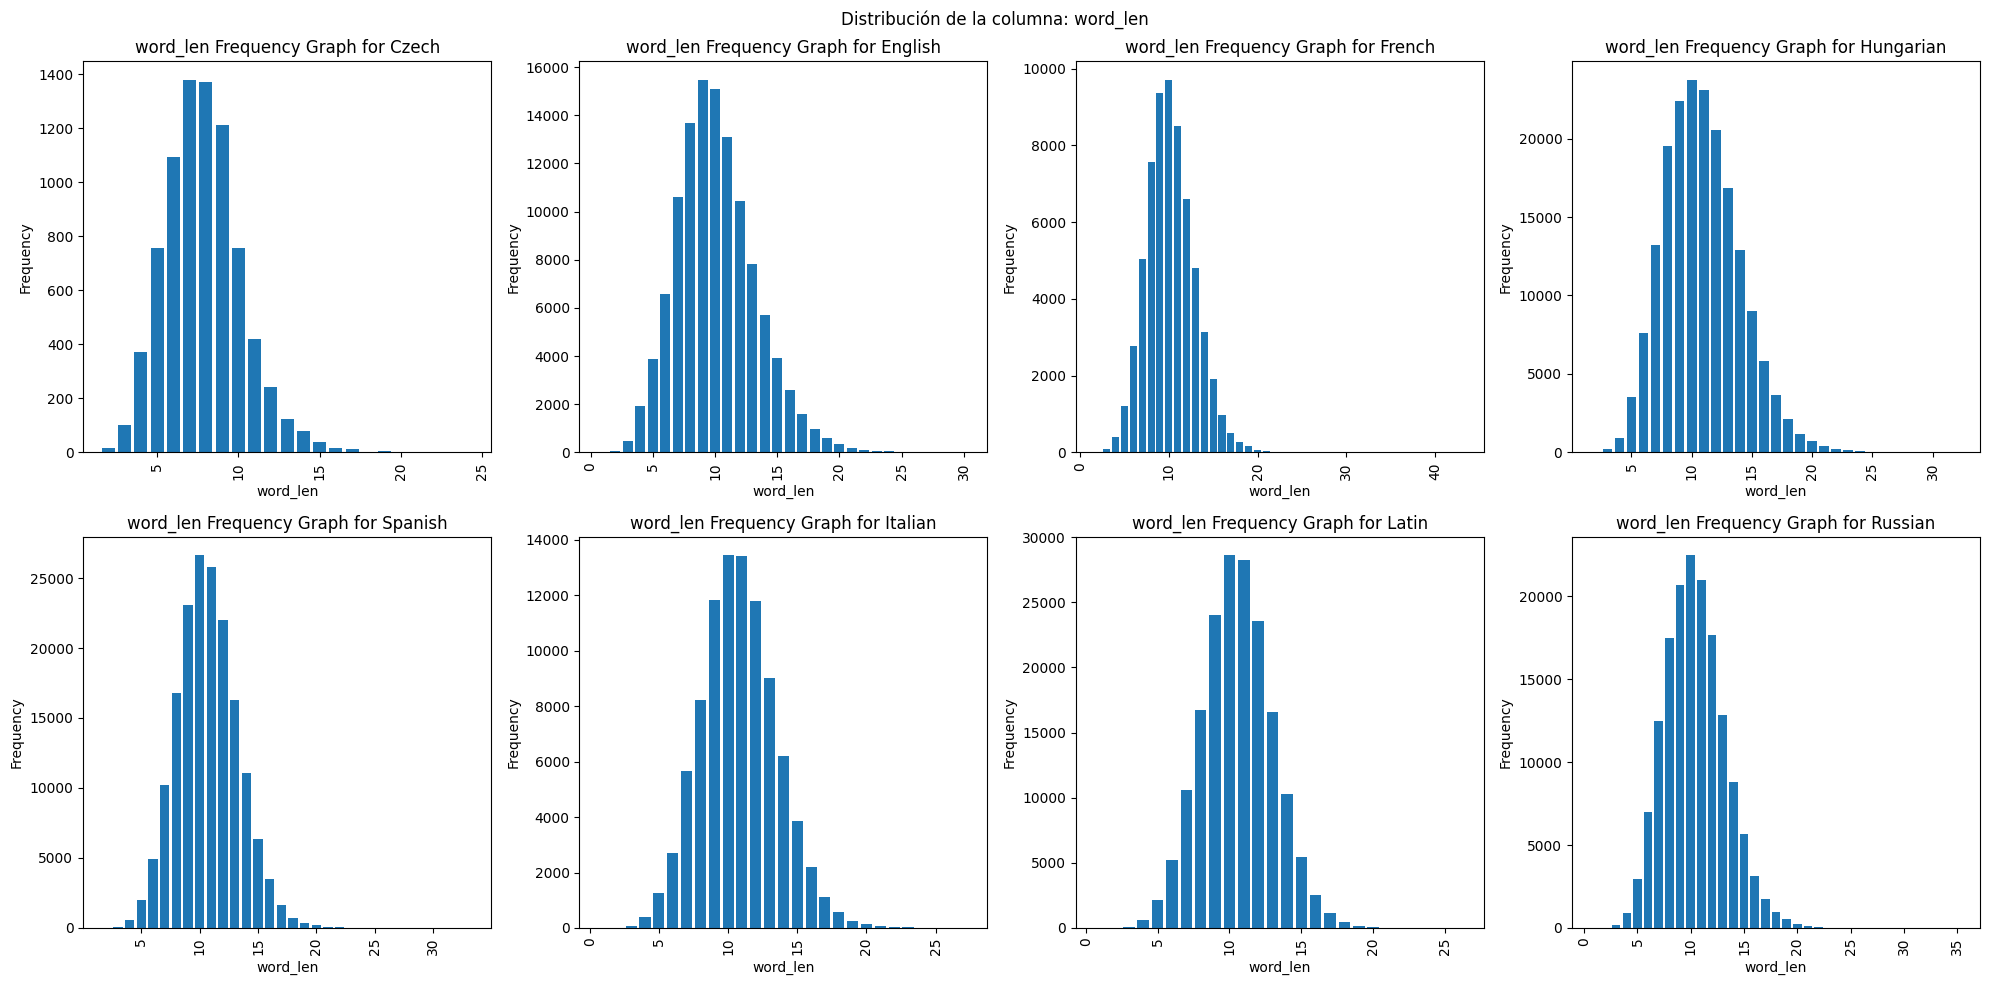

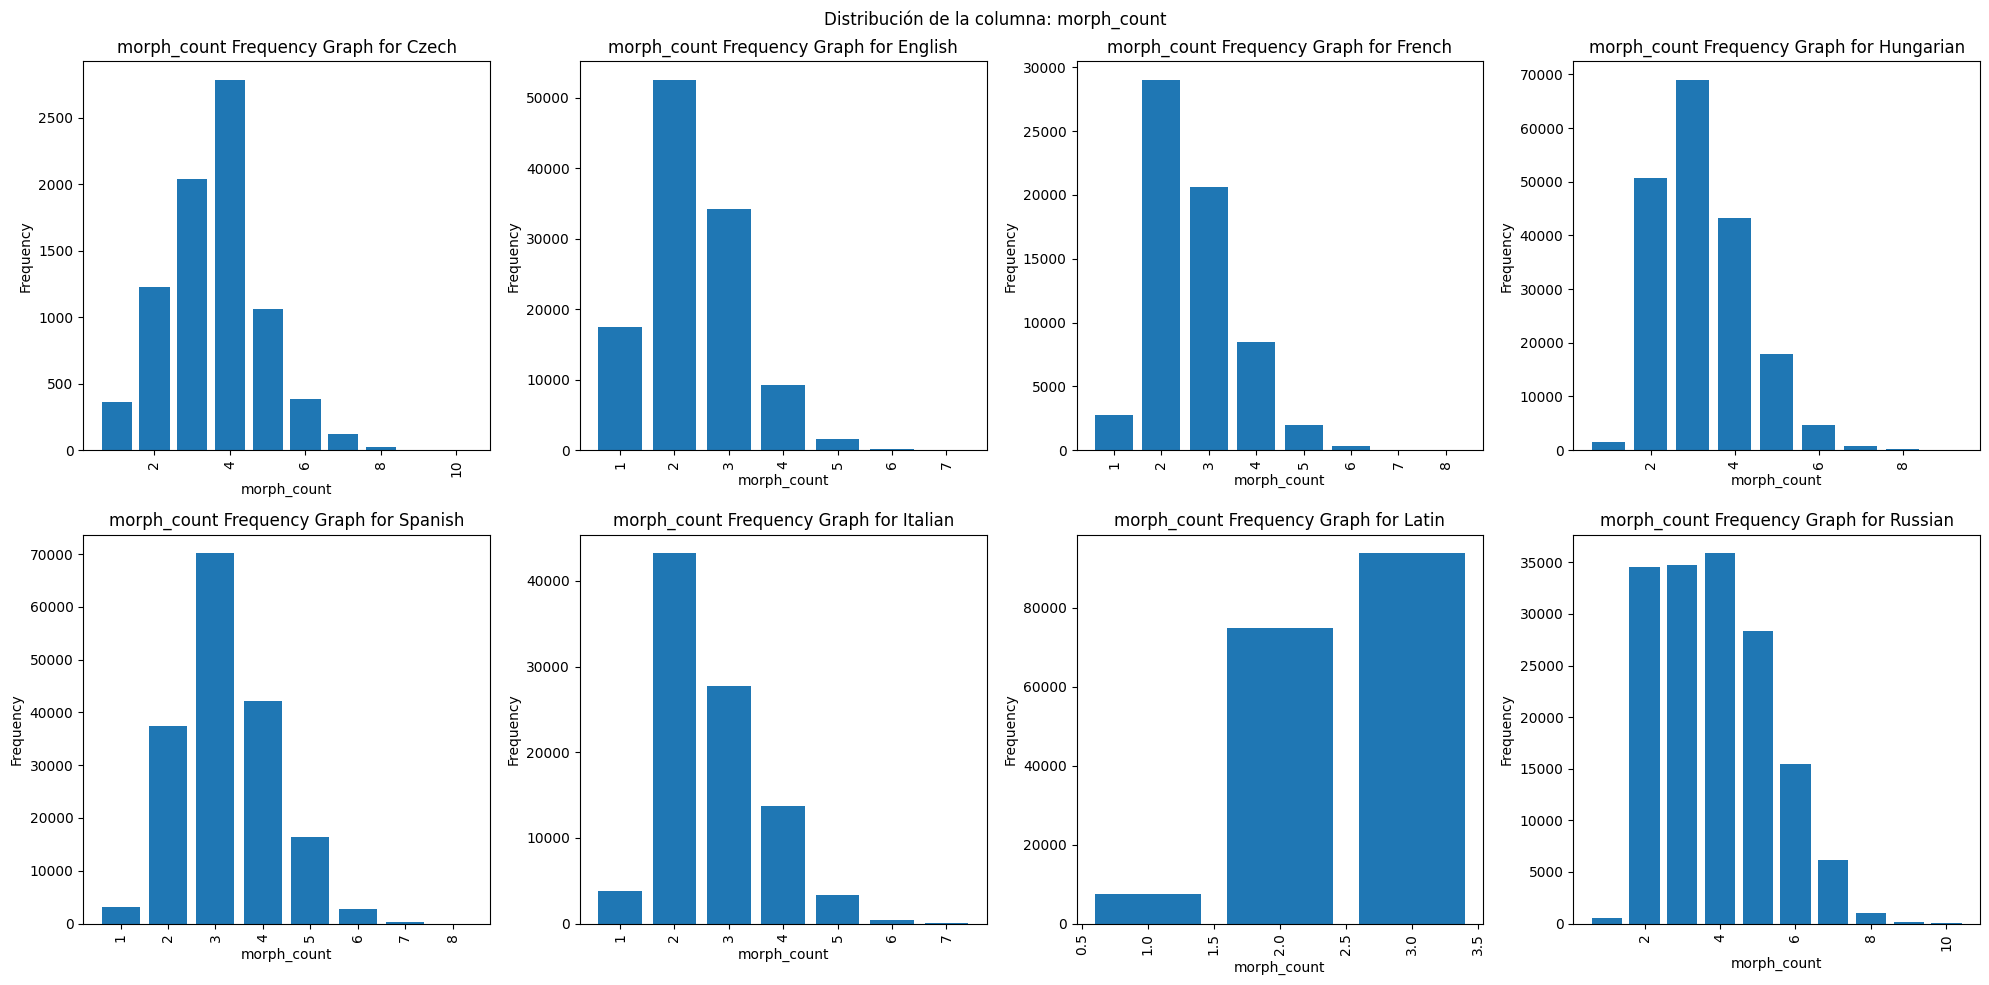

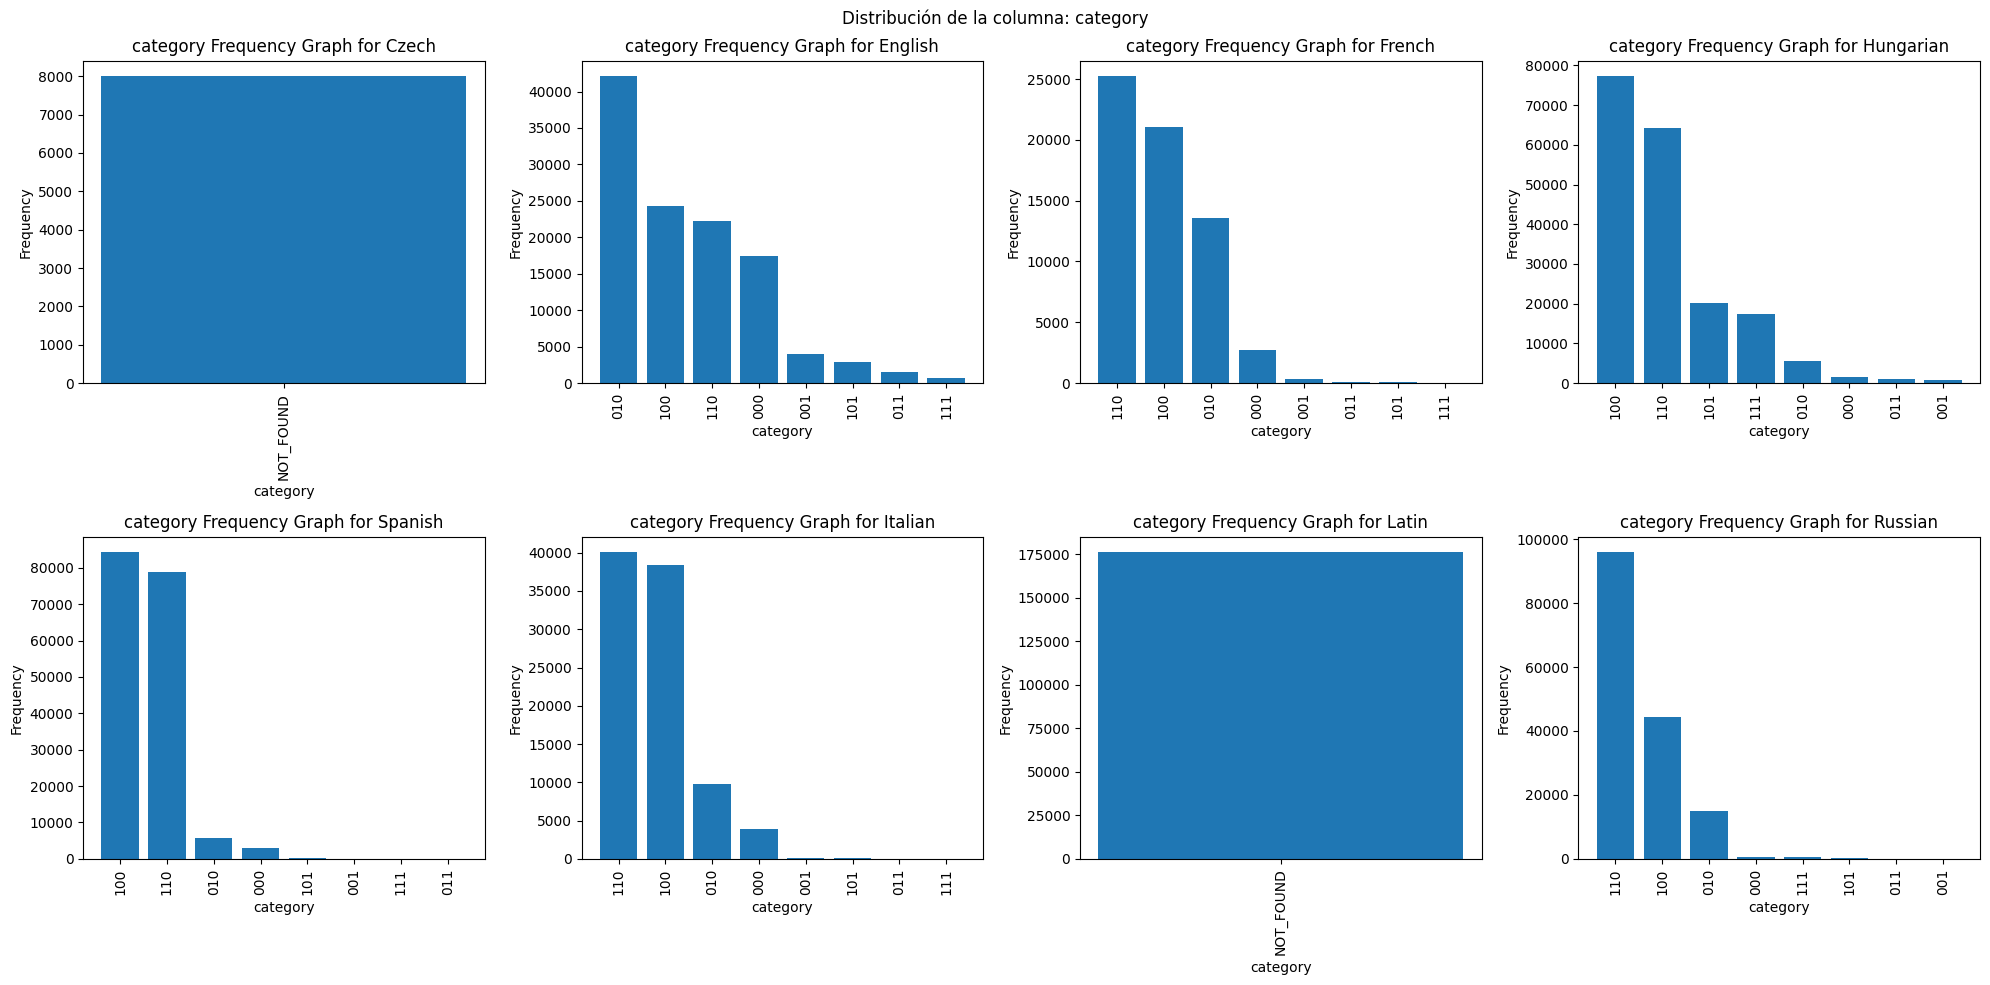

In [ ]:
columns=["word_len","morph_count","category"]
for column in columns:
  plt.figure(figsize=(20, 10))
  plt.suptitle(f"Distribución de la columna: {column}")

  i=1
  for lang_short, lang_name in LANGS.items():
      files = get_track_files(lang_short)
      raw_corpus = get_raw_corpus(files)
      df = raw_corpus_to_dataframe(raw_corpus, lang=lang_short)
      plt.subplot(2, 4, i)
      plot_histogram(df, column, lang_name)

      i+=1
  plt.show()
  print("\n")

Realice una función que imprima por cada lengua lo siguiente:
Total de palabras
La longitud de palabra promedio
La cuenta de morfemas promedio
La categoría más común

In [ ]:
def stats(df):
  print(f"Total de palabras: {df['words'].count()}")
  print(f"Longitud de palabra promedio: {df['word_len'].mean()}")
  print(f"Cuenta de morfemas promedio: {df['morph_count'].mean()}")
  print(f"Categoría más común: {df['category'].value_counts().idxmax()}")

In [ ]:
for lang_short, lang_name in LANGS.items():
  files = get_track_files(lang_short)
  raw_corpus = get_raw_corpus(files)
  df = raw_corpus_to_dataframe(raw_corpus, lang=lang_short)
  print(f"Language: {lang_name}")
  stats(df)
  print("\n")


Language: Czech
Total de palabras: 8000
Longitud de palabra promedio: 7.84275
Cuenta de morfemas promedio: 3.59075
Categoría más común: NOT_FOUND


Language: English
Total de palabras: 115126
Longitud de palabra promedio: 10.10949742021785
Cuenta de morfemas promedio: 2.353230373677536
Categoría más común: 010


Language: French
Total de palabras: 63173
Longitud de palabra promedio: 10.203393854969686
Cuenta de morfemas promedio: 2.6686400835800104
Categoría más común: 110


Language: Hungarian
Total de palabras: 188074
Longitud de palabra promedio: 10.85869923540734
Cuenta de morfemas promedio: 3.2302816976296564
Categoría más común: 100


Language: Spanish
Total de palabras: 172173
Longitud de palabra promedio: 10.688301882408972
Cuenta de morfemas promedio: 3.236227515347935
Categoría más común: 100


Language: Italian
Total de palabras: 92304
Longitud de palabra promedio: 10.795523487606172
Cuenta de morfemas promedio: 2.682657306292252
Categoría más común: 110


Language: Latin
To

#Conclusión
Con base a los histogramas y a los promedios podemos observar varias cosas muy curiosas. Para empezar, la distribución de longitud de palabras parecen muy similares a pesar de ser diferentes lenguas, además todas tienen una media de longitud de palabas de alrededor de 10 caracteres. Además, pasa algo muy similar con la cantidad de morfemas, la distribución es muy parecida y el promedio está muy cercano a 3. En la parte de las categorías sí parece haber un poco más de diferencas, sin embargo en la mayoría predomina la categoría 100 y 110, lo que corresponde "inflexión" y a "inflexión, derivación", respectivamente. Esto a pesar de que la cantidad de palabras es muy diferente entre sí, lo que nos habla de que pareciera haber alguna razón por la cual todas las lenguas se relacionan entre sí, esto puede deberse al principio de mínimo esfuerzo postulado por Zipf, donde los sistemas lingüisticos tienden a optimizar recursos, además, con respecto a las categorías la inflexión es muy importante para cumplir funciones sintácticas y contextualizar palabras dentro de oraciones, por lo que es común que sea la categoría más frecuente sin importar la lengua. Esto nos habla de que no importa la variación cultural, hay principios más básicos y arraigados en la naturaleza humana.

#Extra

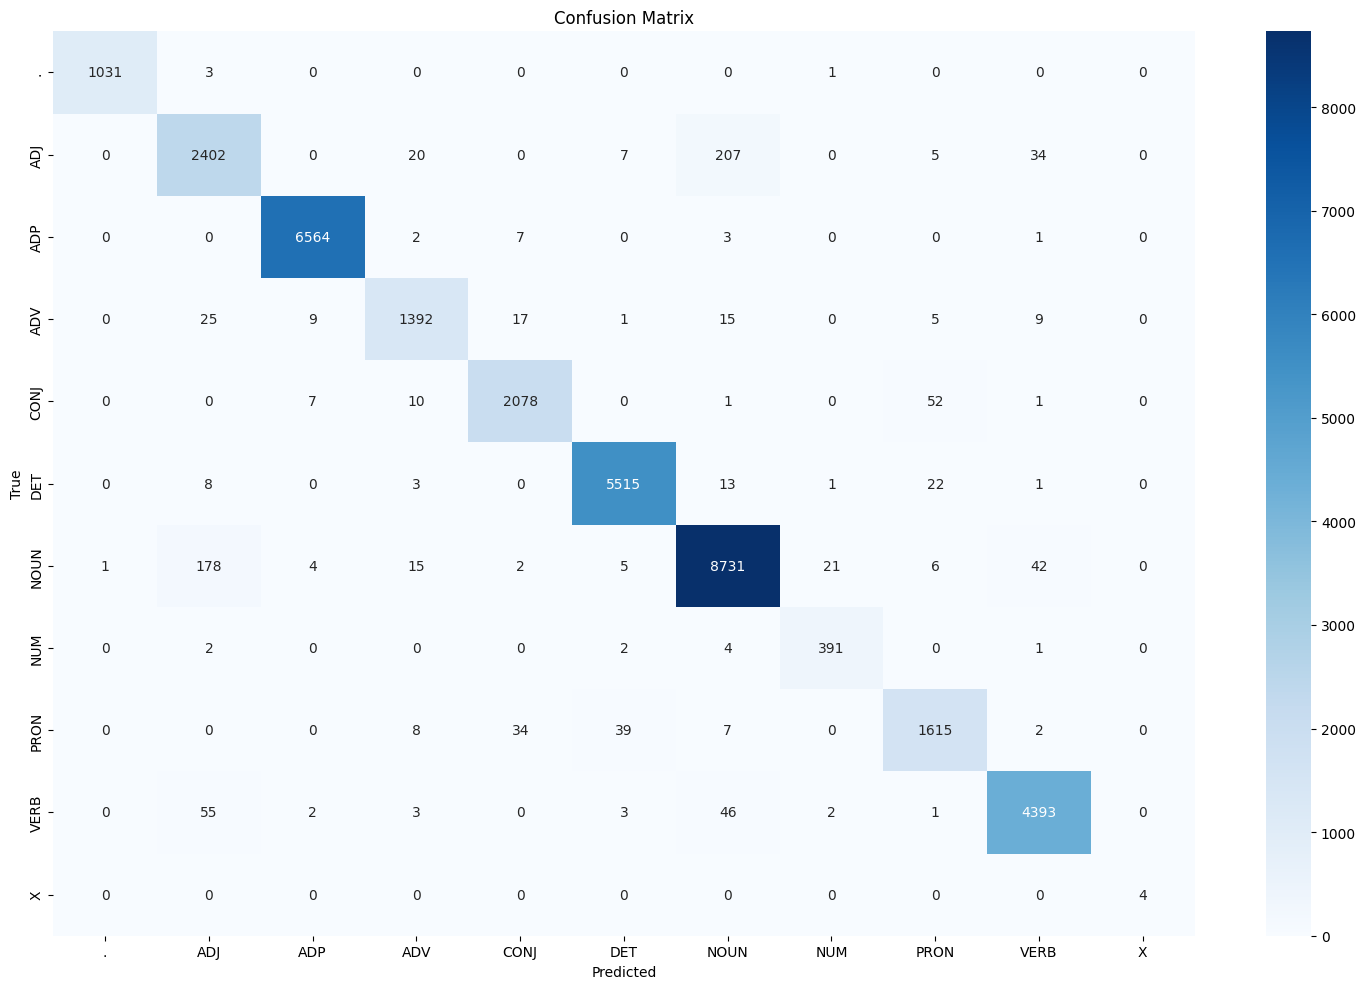

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = sorted(set(y_test_flat))  # Asegura que las etiquetas están ordenadas

cm=confusion_matrix(y_test_flat,y_pred_flat,labels=labels)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()